# Title

## Preliminary

In [1]:
# imports

# %load_ext autoreload
# %autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.optimize import newton

from HANKStickyModel import HANKStickyModelClass

# Overview
1. Model IRFs + Model decomposition
2. Fiscal Multipliers
3. Effect of sticky information

In [13]:
model = HANKStickyModelClass(name='baseline')
model.load()

model_sticky = model.copy()
model_sticky.par.inattention = 0.935

ss = model.ss
par = model.par

relevant_settings = {
    'beta': 'beta_mean',
    'T': 'T',
    'MPC target': 'MPC_target'
}
for key, value in relevant_settings.items():
    print(f'{key}: {par.__dict__[value]}')

beta: 0.9981487814104232
T: 350
MPC target: 0.525


# Tax financed fiscal shock

In [14]:
shock_jumps = ['jump_eg', 'jump_eg_direct', 'jump_eg_distribution', 'jump_eg_debt', 'jump_eg_transfer', 'jump_em', 'jump_ez']
shocks_rho = ['rho_eg', 'rho_eg_direct', 'rho_eg_distribution', 'rho_eg_debt', 'rho_eg_transfer', 'rho_em', 'rho_ez']

In [15]:
# shock_settings for tax financed shock
phi_G = 0.0
tax_jump = 0.01
tax_rho = 0.90
set_shocks = ['jump_eg', 'jump_eg_direct', 'jump_eg_distribution', 'jump_eg_debt']
# Aggregate spending increase
T_max = par.T
delta_G = 0.01 * 0.90 ** np.arange(T_max)
print(f'Shock with parameters jump = {tax_jump}, rho = {tax_rho} leads to a total spending increase of {delta_G.sum()*100:.2f}%')
# set shocks
for i_s, s in enumerate(shock_jumps):
    jump = tax_jump if s in set_shocks else 0.0
    rho = tax_rho if s in set_shocks else 0.0
    model.par.__dict__[s] = model_sticky.par.__dict__[s] = jump
    model.par.__dict__[shocks_rho[i_s]] = model_sticky.par.__dict__[shocks_rho[i_s]] = rho
model.par.phi_G = model_sticky.par.phi_G = phi_G

Shock with parameters jump = 0.01, rho = 0.9 leads to a total spending increase of 10.00%


In [16]:
# compute jacs: model without sticky information
print('Compute Jacobians (no sticky) ')
model.compute_jacs(do_print=False)
# compute jacs: model with sticky information
print('Compute Jacobians (sticky) ')
model_sticky.compute_jacs(do_print=False)
# calc IRFs
print('find IRFs (no sticky)')
model.find_IRFs()
print('find IRFs (sticky)')
model_sticky.find_IRFs()

Compute Jacobians (no sticky) 
Compute Jacobians (sticky) 
find IRFs (no sticky)
find IRFs (sticky)


### varnames ###


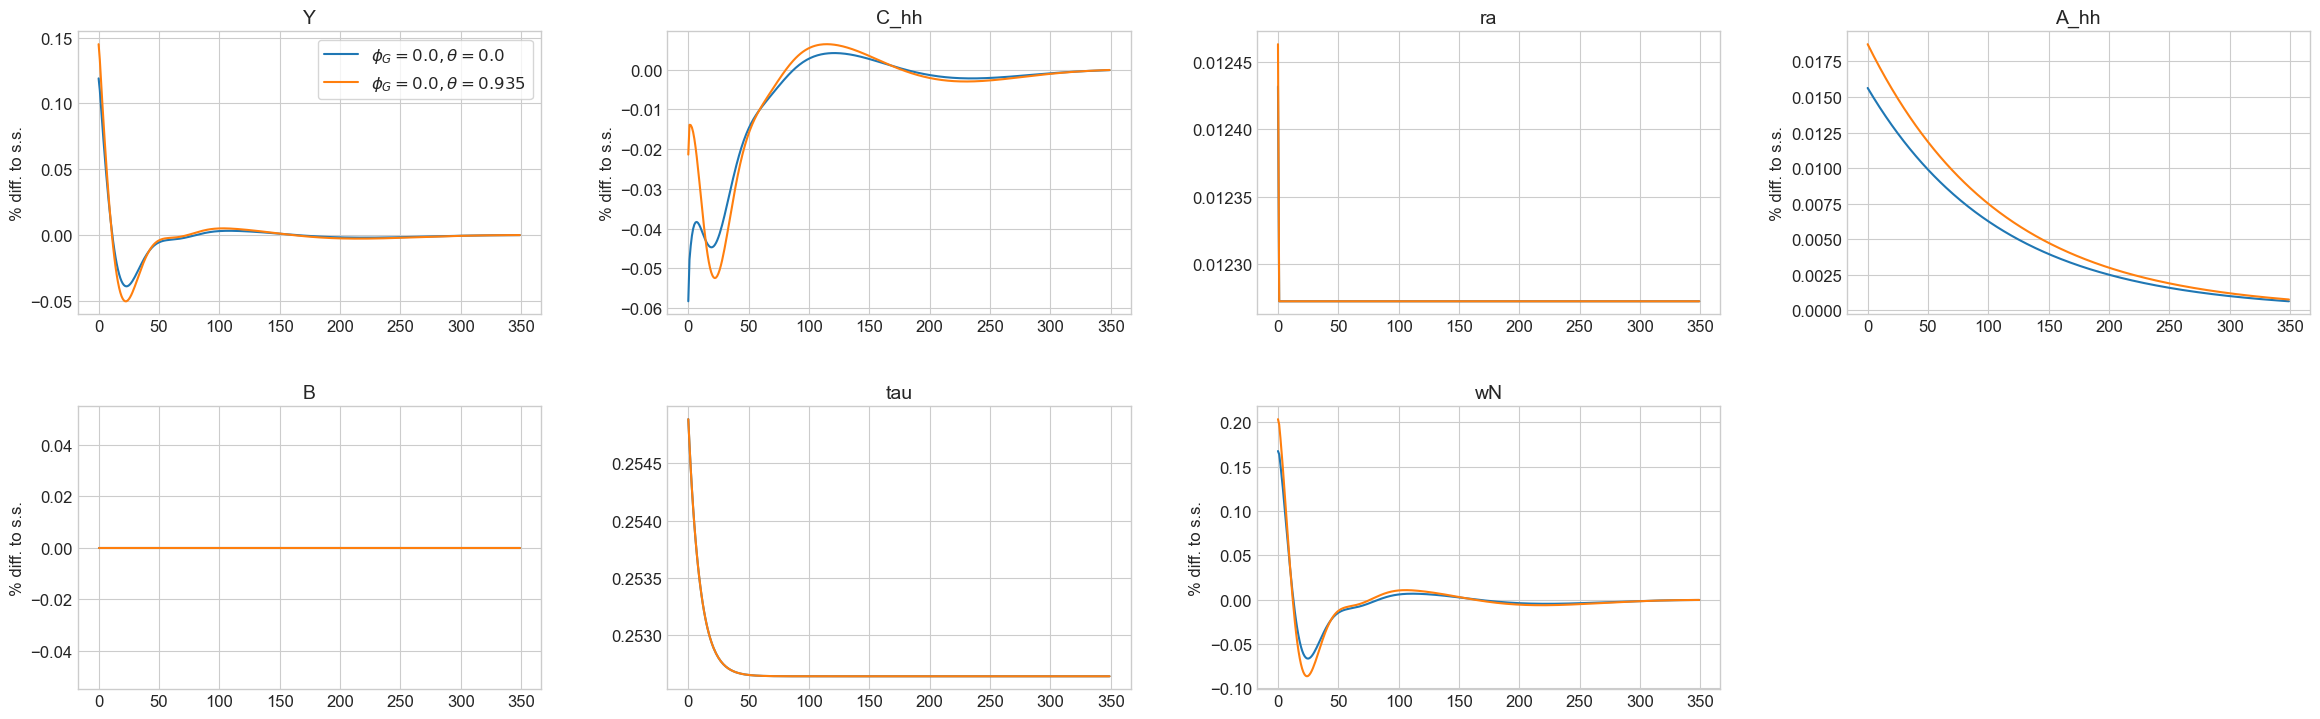

In [6]:
models = [model, model_sticky]
labels = [f'$\phi_G = {m.par.phi_G}, \\theta = {m.par.inattention}$' for m in models]
paths_short = ['Y', 'C_hh', 'ra', 'A_hh', 'B', 'tau', 'wN']
lvl_value = ['eg', 'eg_direct', 'eg_distribution', 'eg_debt', 'eg_transfer', 'ez', 'em', 'r', 'ra', 'tau', 'rk']
model.compare_IRFs(models, labels, paths_short, lvl_value=lvl_value,# facs=facs,
                   do_linear=True, do_non_linear=False, do_targets=False, do_shocks=False)

## Decomposition

In [11]:
model_eg_direct = model.copy()
model_eg_direct.par.jump_eg_distribution = 0.0
model_eg_direct.par.jump_eg_debt = 0.0
model_eg_direct.par.jump_eg = 0.0
model_eg_direct.find_IRFs()
IRF_eg_direct = model_eg_direct.IRF
del(model_eg_direct)

model_eg_distribution = model.copy()
model_eg_distribution.par.jump_eg_direct = 0.0
model_eg_distribution.par.jump_eg_debt = 0.0
model_eg_distribution.par.jump_eg = 0.0
model_eg_distribution.find_IRFs()
IRF_eg_distribution = model_eg_distribution.IRF
del(model_eg_distribution)

model_eg_debt = model.copy()
model_eg_debt.par.jump_eg_direct = 0.0
model_eg_debt.par.jump_eg_distribution = 0.0
model_eg_debt.par.jump_eg = 0.0
model_eg_debt.find_IRFs()
IRF_eg_debt = model_eg_debt.IRF
del(model_eg_debt)

In [18]:
model_interest = model.copy()
model_interest.par.taylor = 'simple'
model_interest.compute_jacs()
# model_interest._compute_jac(inputs='unknowns')
# model_interest._compute_jac(inputs='shocks')
model_interest.find_IRFs()

In [17]:
model_sticky_interest = model_sticky.copy()
model_sticky_interest.par.taylor = 'simple'
model_sticky_interest.compute_jacs()
# model_sticky_interest._compute_jac(inputs='unknowns')
# model_sticky_interest._compute_jac(inputs='shocks')
model_sticky_interest.find_IRFs()

### varnames ###


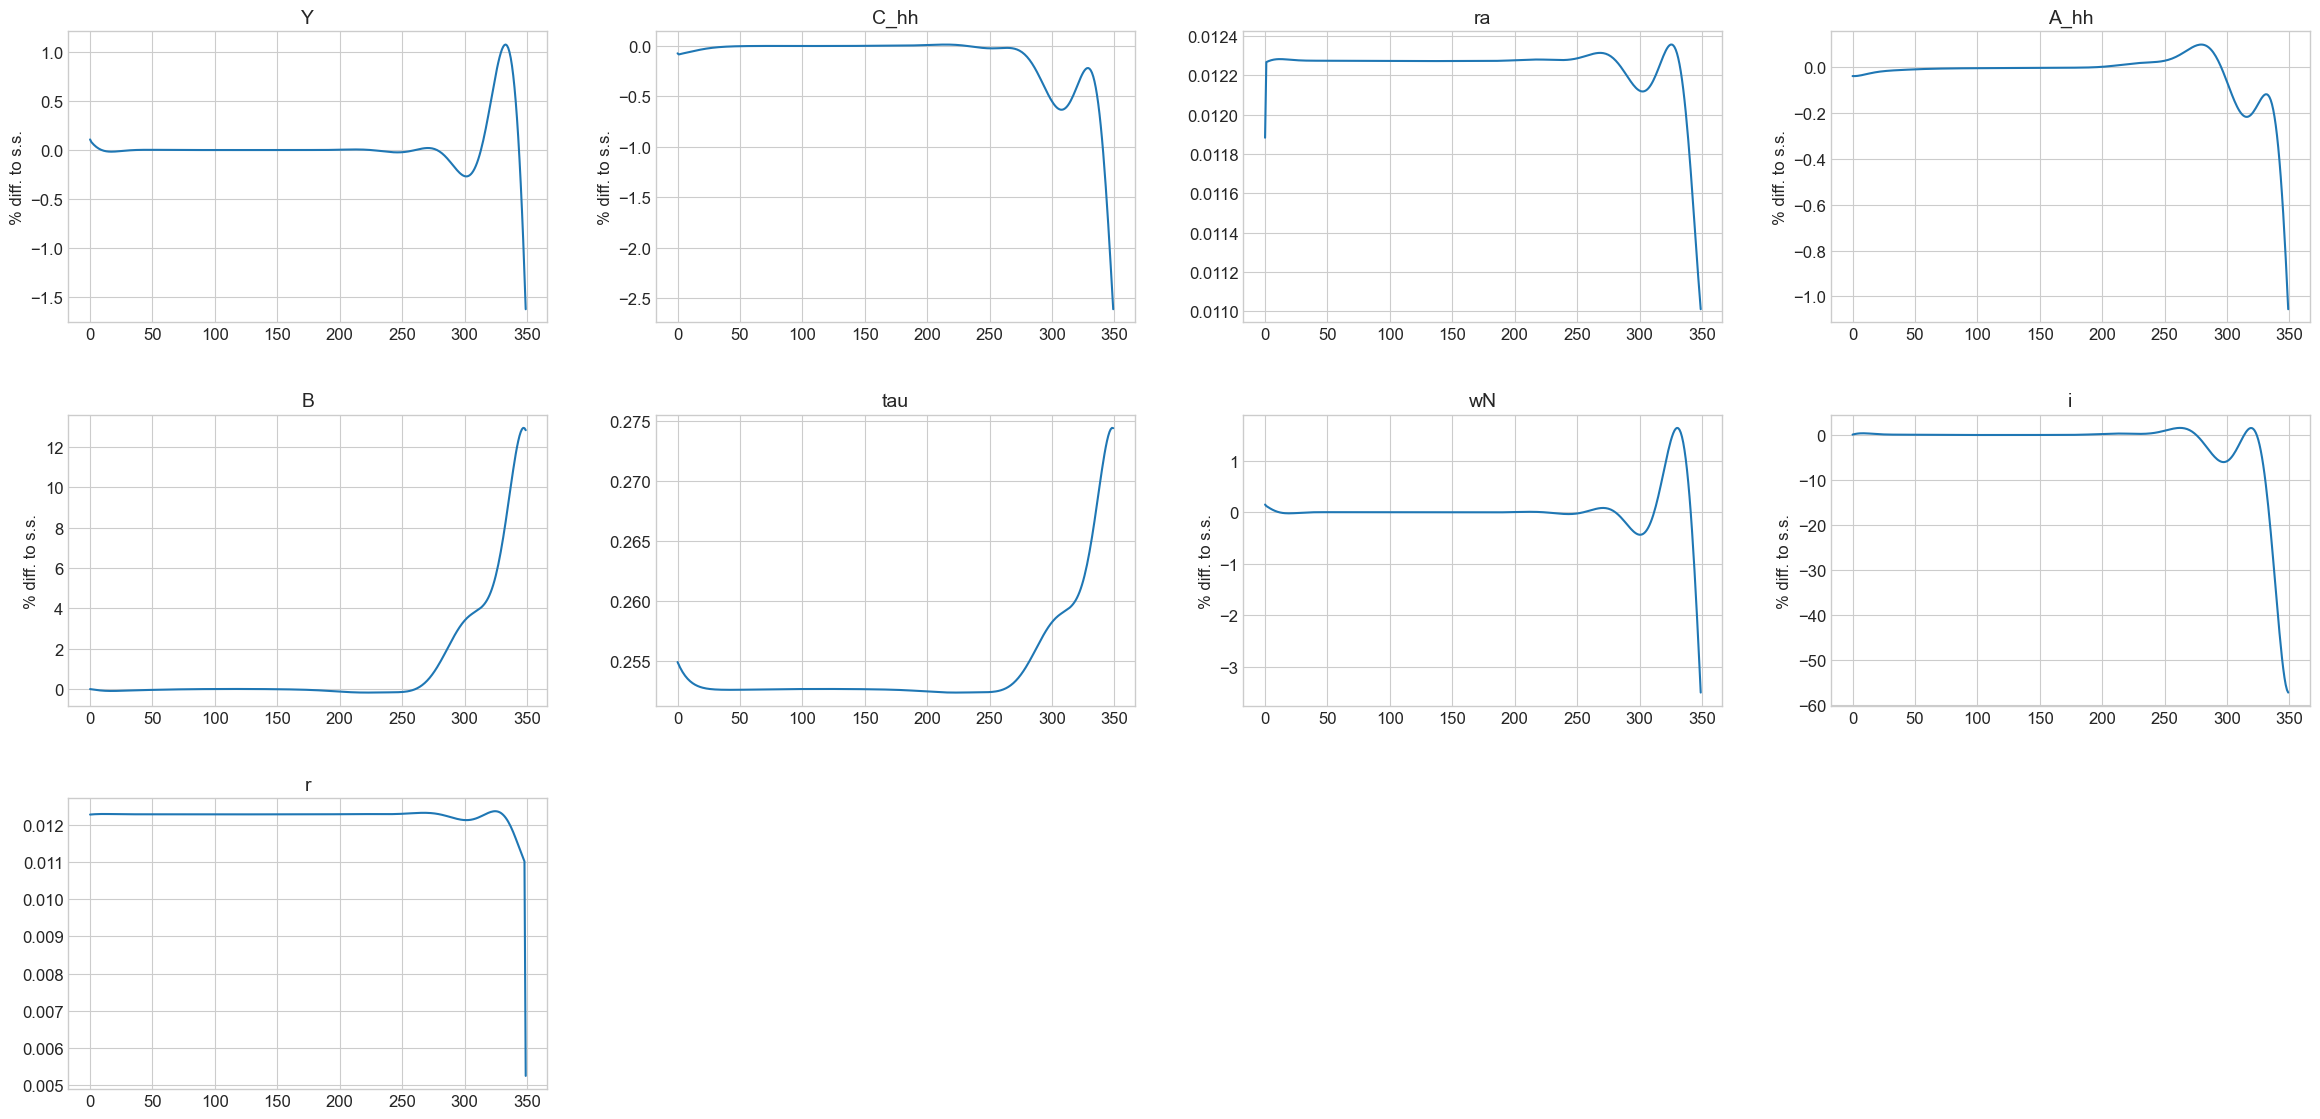


### tagets ###


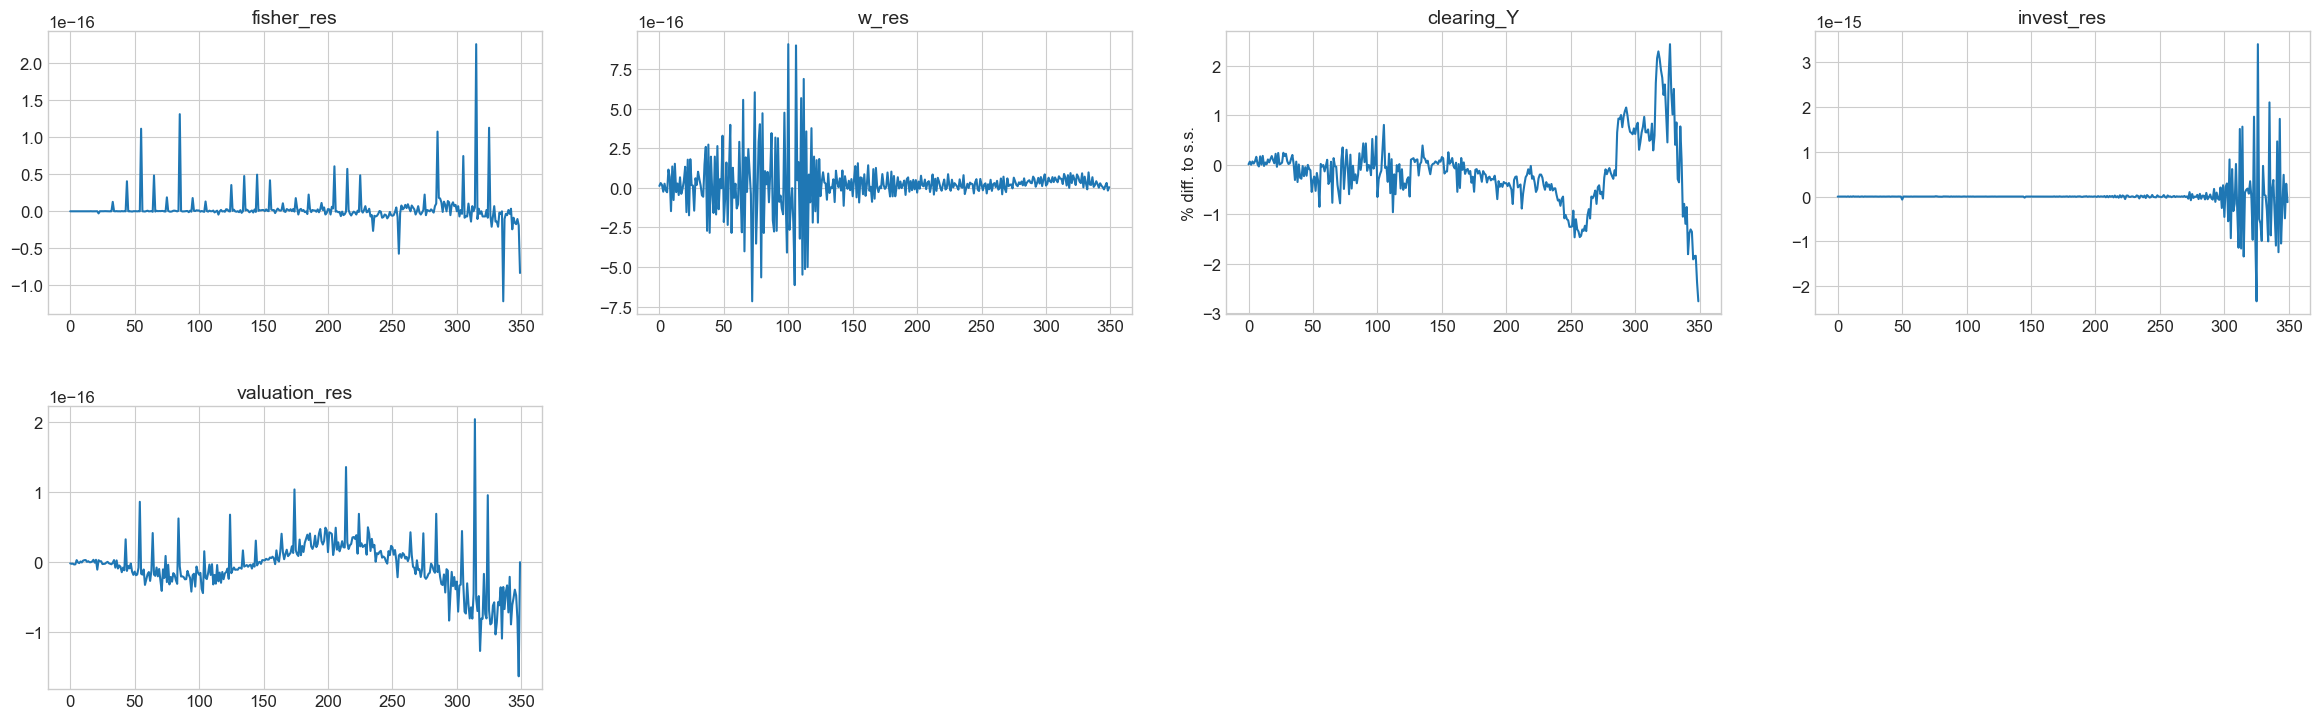

In [12]:
models = [model_interest] #  [model_interest, model_sticky_interest]
labels = [f'$\phi_G = {m.par.phi_G}, \\theta = {m.par.inattention}$' for m in models]
paths_short = ['Y', 'C_hh', 'ra', 'A_hh', 'B', 'tau', 'wN', 'i', 'r']
lvl_value = ['eg', 'eg_direct', 'eg_distribution', 'eg_debt', 'eg_transfer', 'ez', 'em', 'r', 'ra', 'tau', 'rk']
model.compare_IRFs(models, labels, paths_short, lvl_value=lvl_value,# facs=facs,
                   do_linear=True, do_non_linear=False, do_targets=True, do_shocks=False)

In [12]:
model_sticky_eg_direct = model_sticky.copy()
model_sticky_eg_direct.par.jump_eg_distribution = 0.0
model_sticky_eg_direct.par.jump_eg_debt = 0.0
model_sticky_eg_direct.par.jump_eg = 0.0
model_sticky_eg_direct.find_IRFs()

model_sticky_eg_distribution = model_sticky.copy()
model_sticky_eg_distribution.par.jump_eg_direct = 0.0
model_sticky_eg_distribution.par.jump_eg_debt = 0.0
model_sticky_eg_distribution.par.jump_eg = 0.0
model_sticky_eg_distribution.find_IRFs()

model_sticky_eg_debt = model_sticky.copy()
model_sticky_eg_debt.par.jump_eg_direct = 0.0
model_sticky_eg_debt.par.jump_eg_distribution = 0.0
model_sticky_eg_debt.par.jump_eg = 0.0
model_sticky_eg_debt.find_IRFs()


### varnames ###


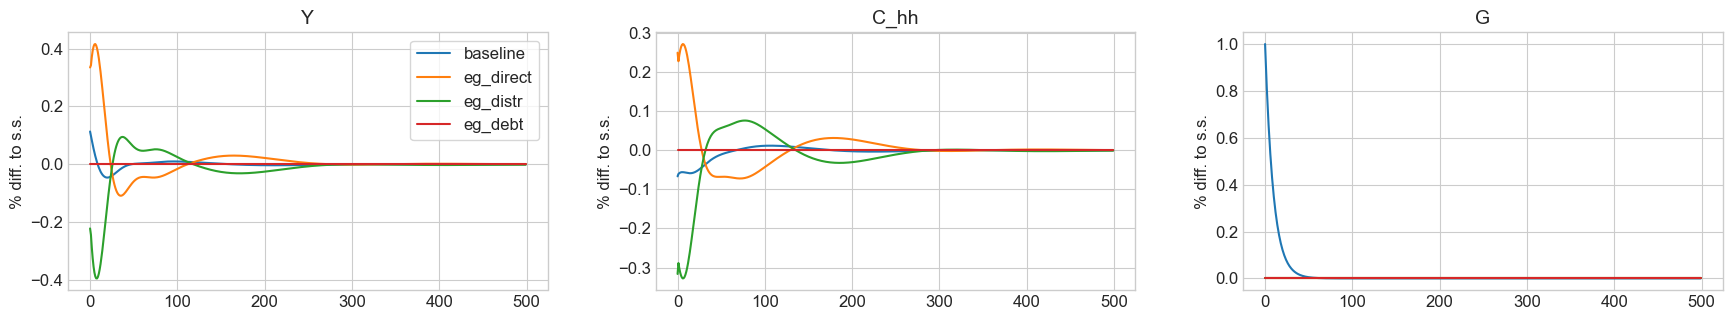

In [23]:
models = [model, model_eg_direct, model_eg_distribution, model_eg_debt]
labels = ['baseline', 'eg_direct', 'eg_distr', 'eg_debt']
paths = ['Y', 'C_hh', 'tau', 'wN', 'I']
paths_short = ['Y', 'C_hh', 'G']
lvl_value = ['eg', 'eg_direct', 'eg_distribution', 'eg_debt', 'eg_transfer', 'ez', 'em', 'r', 'tau', 'rk']
facs = {'r': 100}
model_sticky.compare_IRFs(models, labels, paths_short, lvl_value=lvl_value, facs=facs,
                   do_linear=True, do_non_linear=False, do_targets=False, do_shocks=False)

### varnames ###


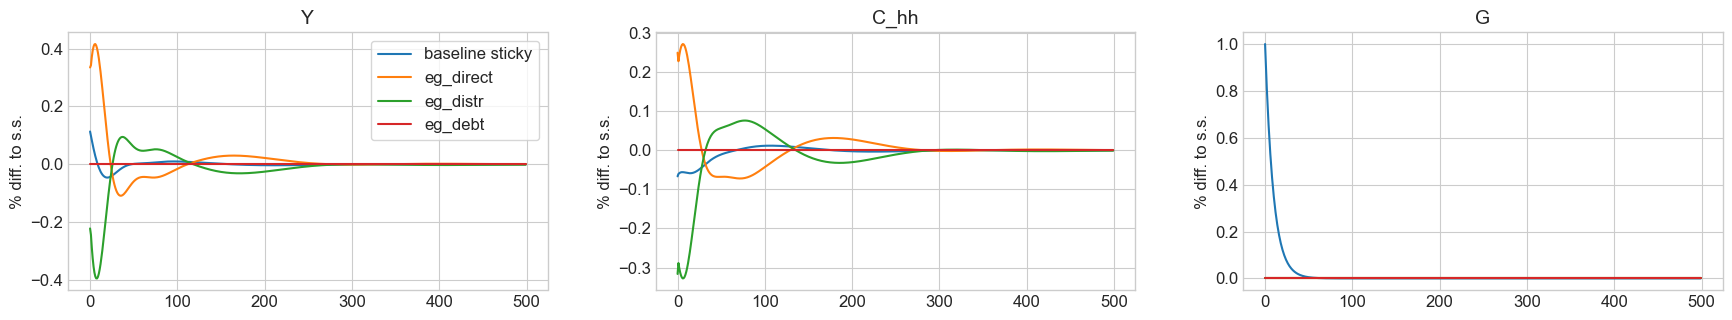

In [19]:
models = [model_sticky, model_sticky_eg_direct, model_sticky_eg_distribution, model_sticky_eg_debt]
labels = ['baseline sticky', 'eg_direct', 'eg_distr', 'eg_debt']
paths = ['Y', 'C_hh', 'G', 'tau', 'w', 'N', 'I', 'q', 'B', 'r', 'rk']
paths_short = ['Y', 'C_hh', 'G']
lvl_value = ['eg', 'eg_direct', 'eg_distribution', 'eg_debt', 'eg_transfer', 'ez', 'em', 'r', 'tau', 'rk']
facs = {'r': 100}
model.compare_IRFs(models, labels, paths_short, lvl_value=lvl_value, facs=facs,
                   do_linear=True, do_non_linear=False, do_targets=False, do_shocks=False)

In [12]:
def calc_FMP(model, cum_FMP_max_T=None):
    """Calculate fiscal multiplier"""

    ss = model.ss
    par = model.par
    IRF = model.IRF

    if cum_FMP_max_T == None:
        cum_FMP_max_T = model.par.T

    assert IRF['eg'].any(), 'No fiscal policy shocks specified'
    assert IRF['G'][0] != 0.0, 't=0, G == 0 -> divide error in fiscal multiplier'

    fmp_impact = IRF['Y'][0] / IRF['G'][0]

    dY = np.array([(1 + ss.r) ** (-t) * IRF['Y'][t] for t in range(par.T)])
    dG = np.array([(1 + ss.r) ** (-t) * IRF['G'][t] for t in range(par.T)])

    fmp_cum = dY[:cum_FMP_max_T].sum() / dG[:cum_FMP_max_T].sum()

    return fmp_impact, fmp_cum

In [13]:
fmp_impact_no_sticky, fmp_cumulative_no_sticky = calc_FMP(model)
_, fmp_cumulative_no_sticky_T_19 =calc_FMP(model, cum_FMP_max_T=19)

In [14]:
print(fmp_impact_no_sticky)
print(fmp_cumulative_no_sticky)
print(fmp_cumulative_no_sticky_T_19)

0.7093321768063279
-0.009571382733758738
0.1978025612108073


In [20]:
models = [model]
labels = ['baseline no sticky']
paths = ['Y', 'C_hh', 'G', 'tau', 'w', 'N', 'I', 'q', 'B', 'r', 'rk']
paths_short = ['Y', 'C_hh', 'G']
lvl_value = ['eg', 'eg_direct', 'eg_distribution', 'eg_debt', 'eg_transfer', 'ez', 'em',  'r', 'tau', 'rk']
facs = {'r':100}
model.compare_IRFs(models, labels, paths, lvl_value=lvl_value, facs=facs,
                   do_linear=True, do_non_linear=False, do_targets=False)

NameError: name 'model_sticky' is not defined

In [16]:
model.par.xi_w
model.par.phi_K

3.0

In [17]:
print(model.ss.L)
print(model.ss.L_hh)

1.403984310502235
1.4042385264050476
